In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [2]:
mangaid = '1-72322'
nsa_z = 0.126168
BHMASS = []
plateifu = '8143-6101'

In [3]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8143-6101-LOGCUBE.fits.gz')

In [4]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
# flux

In [5]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [6]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [7]:
# mask

In [8]:
# retrieve the wave values 
wave = data['WAVE'].data

In [9]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

In [10]:
do_not_use = (mask & 2**10) != 0

# if do_not_use is the one that is != 0, then that mean I have to flip the truth value of the array before I sum 
# the flux right ? To make the ones which are True in do_not_use False, and then multiply it to the flux density
# value before the summation. 


# flux_m = np.ma.array(flux, mask=do_not_use)

# redshift = 0.126168
# ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
# halpha = flux_m[:, :, :].sum(axis=2)
# im = halpha.T

# # Convert from array indices to arcsec relative to IFU center
# dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
# dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
# x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
# y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
# extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

In [11]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [12]:
do_not_use[27,27]

array([False, False, False, ...,  True,  True,  True])

In [13]:
~do_not_use[27,27]

array([ True,  True,  True, ..., False, False, False])

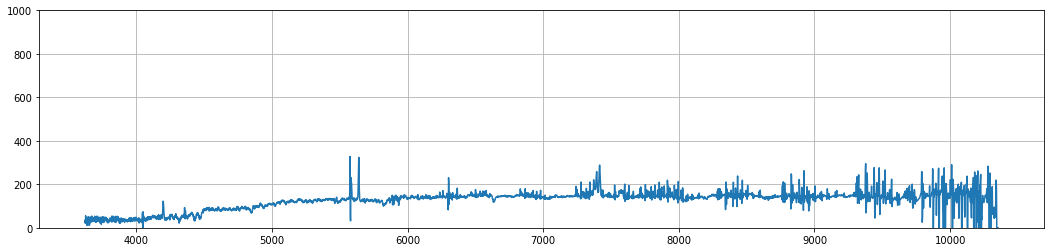

In [14]:
plt.figure(figsize = (18,4))
plt.grid()
plt.ylim(0,1000)
plt.plot(wave, sumflux)

In [31]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/drpall-v2_4_3.fits")

In [44]:
# drpall_list[0].header

In [43]:
# drpall_list[1].header

In [36]:
platelist = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/platelist-v2_4_3.fits")

In [40]:
# platelist[0].header

In [41]:
# platelist[1].header

In [42]:
# platelist[2].header